# Airbnb Dublin

### Assignment 

Airbnb wants to understand:

* What guests are searching for in Dublin
* Which inquiries do hosts tend to accept 
* What gaps exist between guest demand and host supply 
* Other information that deepens understanding of data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

contacts = pd.read_csv("/Users/greenboi/ComputerScience/Python/Python Frameworks/Data Assignments/data/dublin/contacts.tsv", sep='\t')
searches = pd.read_csv("/Users/greenboi/ComputerScience/Python/Python Frameworks/Data Assignments/data/dublin/searches.tsv", sep='\t')


In [2]:
contacts

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14
...,...,...,...,...,...,...,...,...,...,...,...
7818,ffe366f0-6ab6-4e94-818a-c69c125fed3c,8be6bf94-aeb3-4a51-8ac4-db60baedfea1,7732bad8-e800-49f3-8751-e7604e3fb5a3,2014-10-07 21:43:00.0,2014-10-08 08:19:33.0,2014-10-08 08:19:33.0,NaN,2014-10-17,2014-10-20,2,5
7819,ffe366f0-6ab6-4e94-818a-c69c125fed3c,b92639c1-a5a8-48f6-8484-4fe6f62d1c6d,cc3a6bd4-d64f-4cbe-b947-c36c3851b487,2014-10-13 15:38:28.0,2014-10-13 15:44:56.0,NaN,NaN,2014-10-17,2014-10-20,2,5
7820,ffe366f0-6ab6-4e94-818a-c69c125fed3c,d0b6d89a-4379-43f2-9560-4943df5b8f4f,6e5b4380-66d2-4f2a-8f89-d2794598997d,2014-10-13 15:40:49.0,2014-10-13 15:42:46.0,NaN,NaN,2014-10-17,2014-10-20,2,3
7821,ffe366f0-6ab6-4e94-818a-c69c125fed3c,f86bc9ab-e199-4254-8609-fd67d6aaed42,28caf371-6d1d-4e06-aaf1-e660966ac7a1,2014-10-07 21:30:31.0,2014-10-08 19:04:43.0,NaN,NaN,2014-10-17,2014-10-20,2,2


In [3]:
searches

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaN,NaN,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaN,NaN,2,NaN,1,1,US,NaN,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaN,NaN,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN


In [4]:
contacts.isna().sum()/len(contacts)

id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64

In [5]:
searches.isna().sum()/len(searches)

ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64

In [6]:
searches = searches.drop(columns=['filter_neighborhoods'])

In [7]:
searches.dtypes

ds                    object
id_user               object
ds_checkin            object
ds_checkout           object
n_searches             int64
n_nights             float64
n_guests_min           int64
n_guests_max           int64
origin_country        object
filter_price_min     float64
filter_price_max     float64
filter_room_types     object
dtype: object

The date columns (ds, ds_checkin, ds_checkout) are object types. These columns can be converted to DateTime type for easier manipulation.

In [8]:
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

In [9]:
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


We can see that the number of guests is usually 1 or 2. 

We also want to calculate the skewness of the dataset. Skewness is where the distribution of values leans towards a specific side from the normal distribution. 

In [10]:
searches.skew(axis=0, numeric_only=True, skipna=True)

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

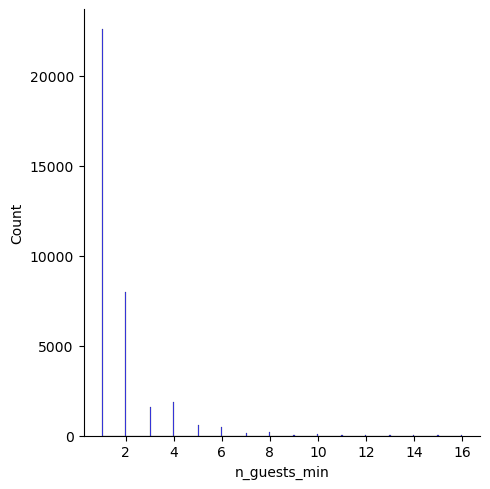

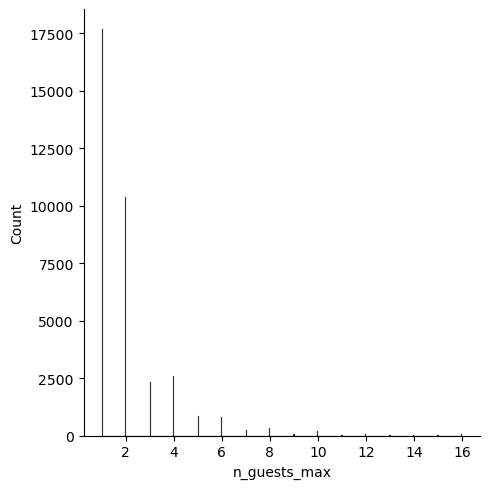

In [11]:
sns.displot(searches, x='n_guests_min', color='blue')
sns.displot(searches, x='n_guests_max', color='black')
plt.show()


[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

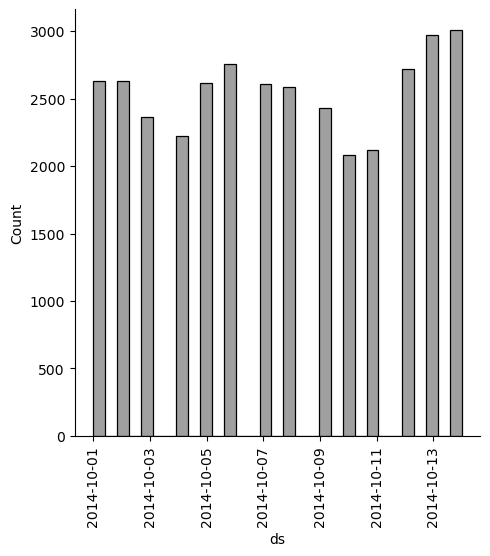

In [12]:
ax = sns.displot(searches, x='ds', color='gray')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

In [13]:
# NOTE: Percentage of a dataset with a filter_price_max above 600 
print(len(searches[searches['filter_price_max'] > 600]) / len(searches['filter_price_max']) * 100, '%')

5.311022189887232 %


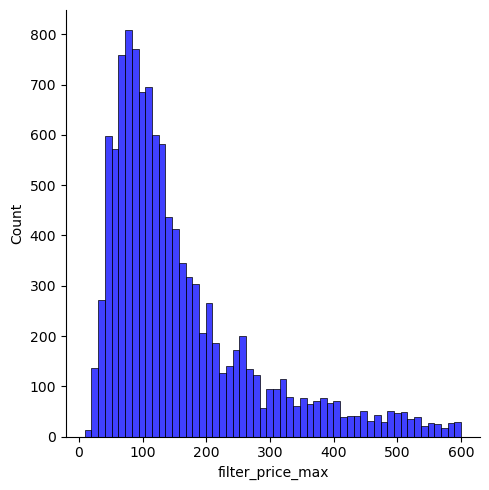

In [14]:
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]

sns.displot(x=searches_maxprice_removed['filter_price_max'], color='blue')
plt.show()

Most people want to search for a room below $200 per night with most searches occurring aroung $100 per night. 

Let's consider how soon people want rooms when booking. 

9.396423874415872 % 



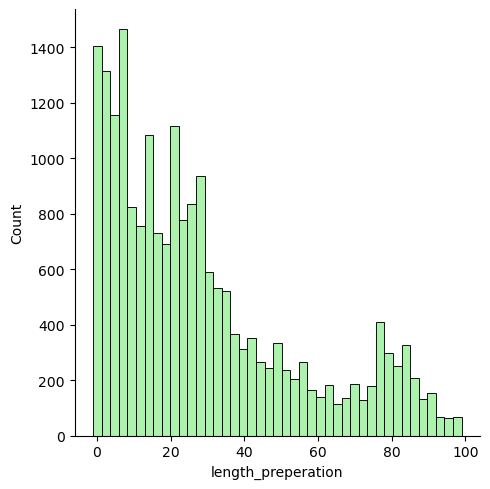

In [16]:
# NOTE: Percentage of dataset beyond 100 days 
distribution = searches['length_preperation'] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100]) / len(distribution) * 100, '% \n')

# NOTE: Remove values beyond 100 days 
distribution = distribution[distribution < 100]

# NOTE: Distribution plot of length_preperation column 
sns.displot(x=distribution, color = 'lightgreen')
plt.show()

We now consider the number of nights people want to stay.

4.737387021854101 % 



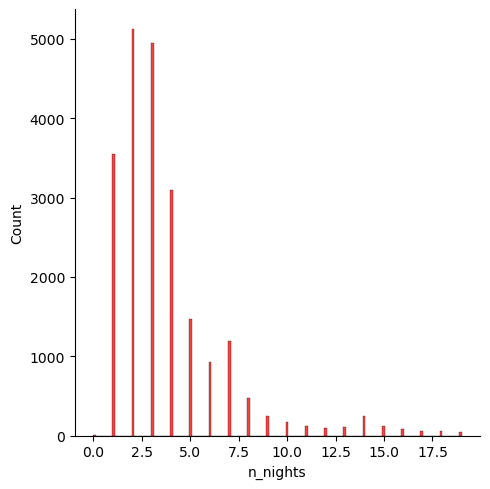

In [18]:
# NOTE: Distribution of n_nights of searches 

# NOTE: Percentage of dataset beyond 20 nights 
print(len(searches[searches['n_nights'] > 20]) / len(searches['n_nights']) * 100, '% \n')

# NOTE: Remove n_nights beyond 20 days 
searches_within_twenty = searches[searches['n_nights'] < 20]

# NOTE: Distribution plot of length_preperation column 
sns.displot(searches_within_twenty, x='n_nights', color='red')
plt.show()